In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
!pip install pydub
!pip install noisereduce

In [ ]:
import os
import numpy as np

from pydub import AudioSegment, effects
import librosa
import noisereduce as nr

import matplotlib.pyplot as plt
from librosa import display
import IPython.display as ipd

## **Audio preprocess for a single file**

In [ ]:
# Define file path for a single file.
path = '/content/drive/MyDrive/03-01-01-01-01-01-02.wav'

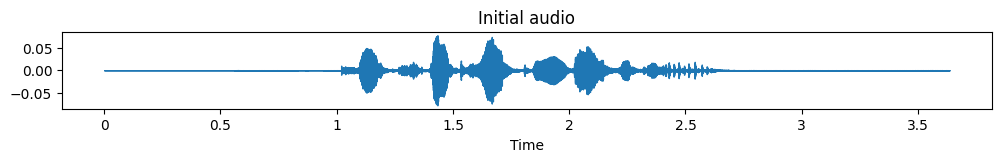

In [ ]:
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file into an 'AudioSegment' object
rawsound = AudioSegment.from_file(path)

# Extract the sample rate using librosa
x, sr = librosa.load(path, sr=None)

# Display the waveform
plt.figure(figsize=(12, 1))
librosa.display.waveshow(x, sr=sr)
plt.title('Initial audio')
plt.show()

rawsound


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Normalize to +5.0 dBFS, Transform audio signals to an array.

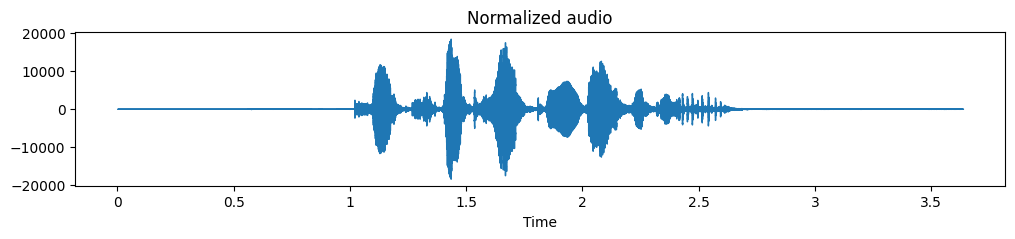

In [ ]:
normalizedsound = effects.normalize(rawsound, headroom = 5.0)
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveshow(normal_x, sr=sr)
plt.title('Normalized audio')

normalizedsound

# 3. Trim silence in the beginning and end.

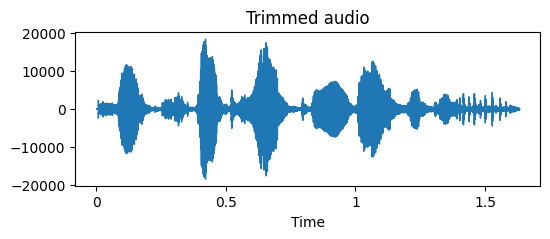

In [ ]:
xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveshow(xt, sr=sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sr))

# 4. Right-side padding for length equalization

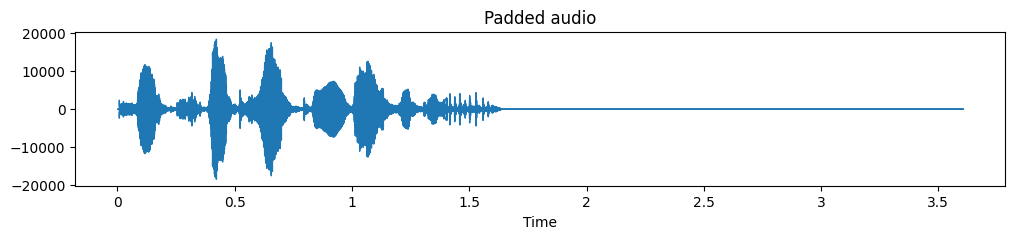

In [ ]:
padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveshow(padded_x, sr=sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sr))

# 5. NOISE REDUCTION

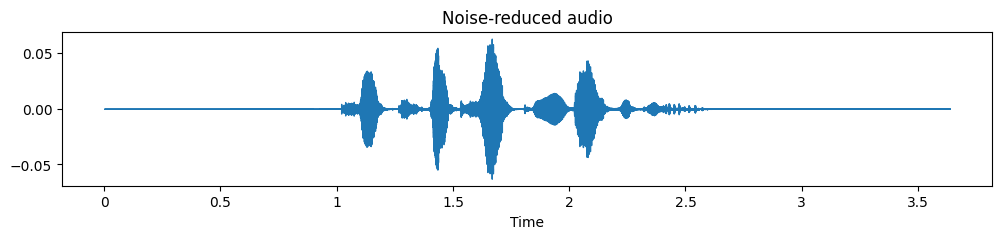

In [ ]:
import noisereduce as nr

# Apply noise reduction
reduced_audio = nr.reduce_noise(y=x, sr=sr, stationary=True)

# Display the noise-reduced waveform
plt.figure(figsize=(12, 2))
librosa.display.waveshow(reduced_audio, sr=sr)
plt.title('Noise-reduced audio')
plt.show()

ipd.display(ipd.Audio(data = reduced_audio, rate=sr))

In [ ]:
frame_length = 2048
hop_length = 512

# Extract features using keyword arguments
f1 = librosa.feature.rms(y=reduced_audio, frame_length=frame_length, hop_length=hop_length)  # Energy - Root Mean Square (RMS)
print('Energy shape:', f1.shape)

f2 = librosa.feature.zero_crossing_rate(y=reduced_audio, frame_length=frame_length, hop_length=hop_length)  # Zero Crossed Rate (ZCR)
print('ZCR shape:', f2.shape)

f3 = librosa.feature.mfcc(y=reduced_audio, sr=sr, n_mfcc=13, hop_length=hop_length)  # MFCCs
print('MFCCs shape:', f3.shape)


Energy shape: (1, 341)
ZCR shape: (1, 341)
MFCCs shape: (13, 341)
